In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des données du S&P500 avec l'historique maximal disponible
ticker = "URTH"
data = yf.download(ticker, period="max", interval="1d")
# Filtrage des données après l'année 2000
data = data[data.index >= "2000-01-01"]

# Renommer les colonnes pour correspondre à la demande
data.reset_index(inplace=True)
data = data.rename(columns={'Date': 'DATE', 'Open': 'OPEN', 'High': 'HIGH', 'Low': 'LOW', 'Close': 'CLOSE'})
data = data[['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE']]

# Conversion de la colonne DATE en format datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Ajout des colonnes MONTH_DAY (jour du mois) et MONTH (mois au format yyyy-mm)
data['MONTH_DAY'] = data['DATE'].dt.day
data['MONTH'] = data['DATE'].dt.to_period('M').astype(str)

# Normalisation de chaque mois avec une base 100
normalized_data = data.copy()
normalized_data['BASE_OPEN'] = np.nan
normalized_data['BASE_HIGH'] = np.nan
normalized_data['BASE_LOW'] = np.nan
normalized_data['BASE_CLOSE'] = np.nan

# Itération par mois pour normaliser les données avec une base de 100
for month in normalized_data['MONTH'].unique():
    monthly_data = normalized_data[normalized_data['MONTH'] == month]
    if not monthly_data.empty:
        # Récupérer la valeur d'ouverture du premier jour ouvré du mois
        base_open = monthly_data.iloc[0]['OPEN']
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_OPEN'] = 100 * (monthly_data['OPEN'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_HIGH'] = 100 * (monthly_data['HIGH'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_LOW'] = 100 * (monthly_data['LOW'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_CLOSE'] = 100 * (monthly_data['CLOSE'] / base_open)

normalized_data.tail(15)

[*********************100%***********************]  1 of 1 completed


,DATE,OPEN,HIGH,LOW,CLOSE,MONTH_DAY,MONTH,BASE_OPEN,BASE_HIGH,BASE_LOW,BASE_CLOSE
3223,2024-11-04,154.639999,154.990005,153.820007,154.139999,4,2024-11,100.019403,100.245783,99.489041,99.696009
3224,2024-11-05,154.460007,156.000000,154.460007,155.960007,5,2024-11,99.902986,100.899036,99.902986,100.873169
3225,2024-11-06,158.009995,158.509995,156.889999,158.360001,6,2024-11,102.199078,102.522472,101.474677,102.425458
3226,2024-11-07,159.289993,160.169998,159.199997,159.910004,7,2024-11,103.026966,103.596144,102.968758,103.427982
3227,2024-11-08,159.639999,160.199997,159.479996,159.880005,8,2024-11,103.253346,103.615546,103.149858,103.408579
3228,2024-11-11,160.410004,160.529999,159.860001,160.250000,11,2024-11,103.751376,103.828988,103.395641,103.647888
3229,2024-11-12,159.880005,160.009995,158.490005,159.179993,12,2024-11,103.408579,103.492655,102.509543,102.955819
3230,2024-11-13,159.070007,159.520004,158.429993,158.970001,13,2024-11,102.884682,103.175735,102.470728,102.819999
3231,2024-11-14,159.339996,159.449997,158.199997,158.309998,14,2024-11,103.059308,103.130455,102.321969,102.393116
3232,2024-11-15,157.559998,157.559998,156.149994,156.660004,15,2024-11,101.908025,101.908025,100.996050,101.325919


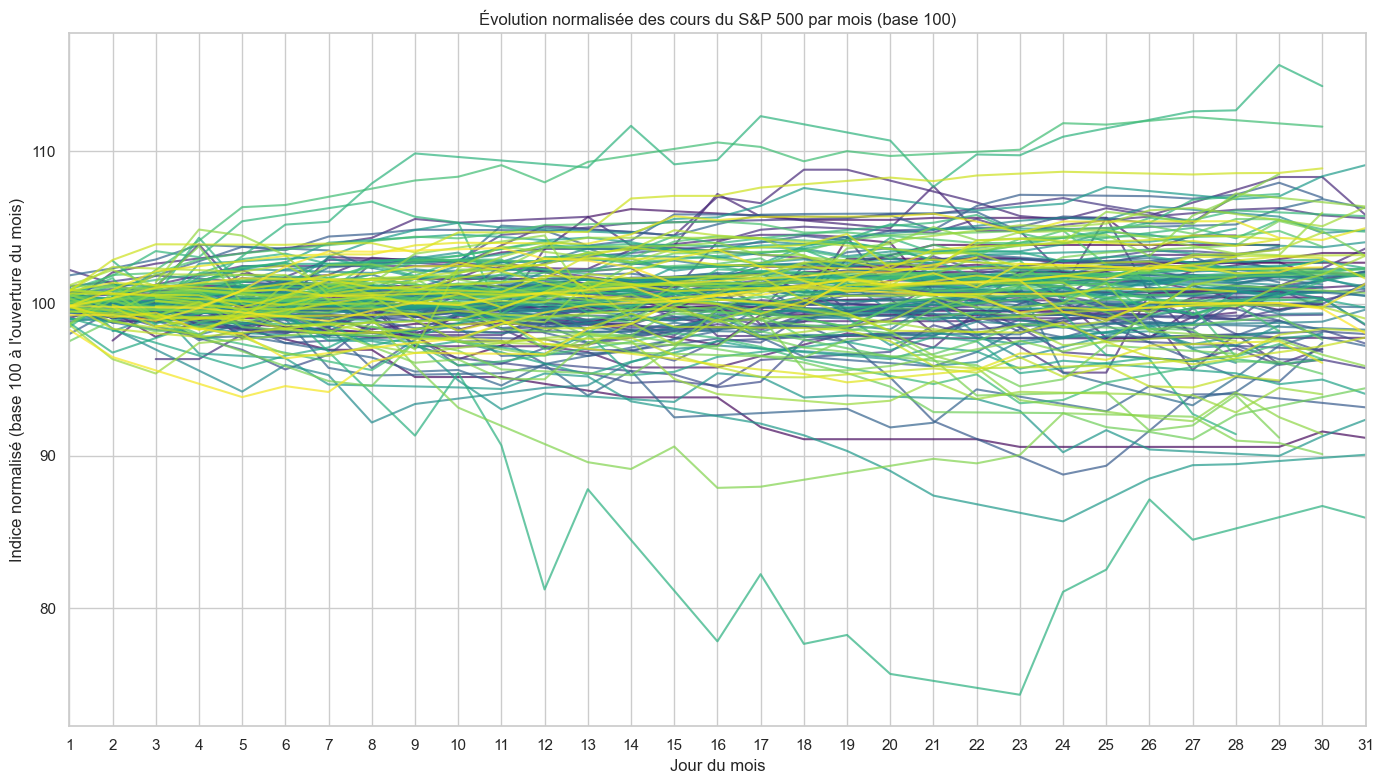

In [2]:
# Plot des séries normalisées pour chaque mois
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
cmap = plt.get_cmap("viridis")
unique_months = normalized_data['MONTH'].unique()
colors = cmap(np.linspace(0, 1, len(unique_months)))

# Tracer chaque série de mois
for i, month in enumerate(unique_months):
    monthly_data = normalized_data[normalized_data['MONTH'] == month]
    plt.plot(monthly_data['MONTH_DAY'], monthly_data['BASE_CLOSE'], label=month, color=colors[i], alpha=0.7)

plt.title('Évolution normalisée des cours du S&P 500 par mois (base 100)')
plt.xlabel('Jour du mois')
plt.ylabel('Indice normalisé (base 100 à l\'ouverture du mois)')
plt.xticks(range(1, 32))
plt.xlim(1, 31)
plt.grid(True)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small')  # Utilisation de la légende pour les mois
plt.tight_layout()
plt.show()

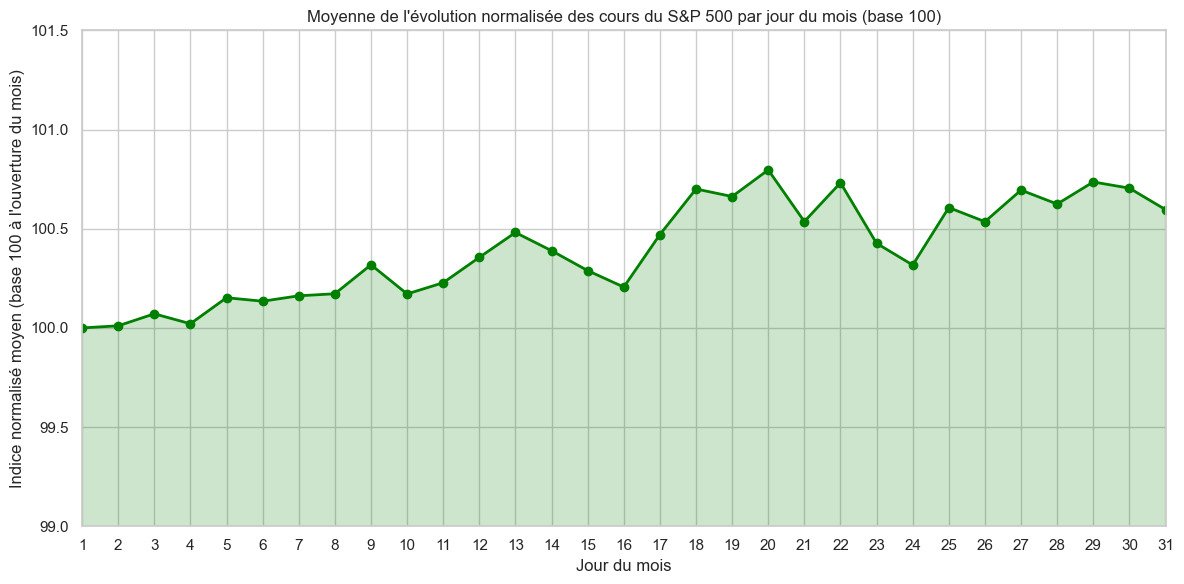

In [3]:
# Calcul de la moyenne pour chaque jour du mois (pour le second graphique)
mean_data = normalized_data.groupby('MONTH_DAY').mean(numeric_only=True)

# Plot de la moyenne des séries par jour du mois
plt.figure(figsize=(12, 6))
plt.plot(mean_data.index, mean_data['BASE_OPEN'], marker='o', color='green', linestyle='-', linewidth=2)
plt.fill_between(mean_data.index, mean_data['BASE_OPEN'], color='green', alpha=0.2)
plt.title('Moyenne de l\'évolution normalisée des cours du S&P 500 par jour du mois (base 100)')
plt.xlabel('Jour du mois')
plt.ylabel('Indice normalisé moyen (base 100 à l\'ouverture du mois)')
plt.xticks(range(1, 32))
plt.xlim(1, 31)
plt.ylim(99,101.5)
plt.grid(True)
plt.tight_layout()
plt.show()

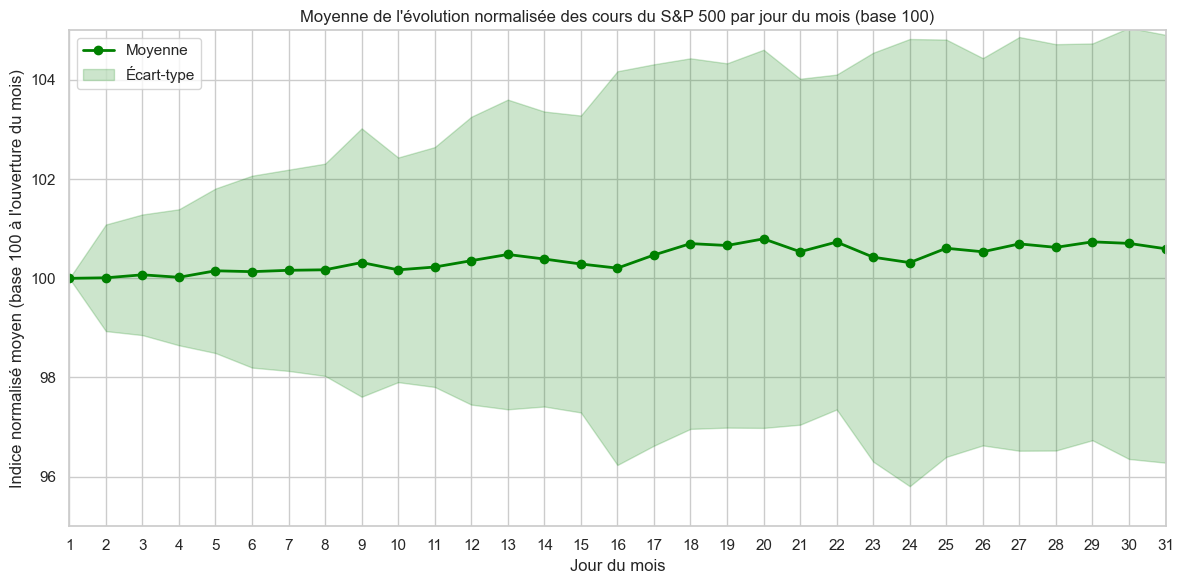

In [4]:
# Calcul de l'écart-type pour chaque jour du mois
std_data = normalized_data.groupby('MONTH_DAY').std(numeric_only=True)

# Ajout des colonnes SIGMA pour chaque variable
mean_data['SIGMA_OPEN'] = std_data['BASE_OPEN']
mean_data['SIGMA_HIGH'] = std_data['BASE_HIGH']
mean_data['SIGMA_LOW'] = std_data['BASE_LOW']
mean_data['SIGMA_CLOSE'] = std_data['BASE_CLOSE']

# Plot de la moyenne des séries par jour du mois avec l'écart-type
plt.figure(figsize=(12, 6))
plt.plot(mean_data.index, mean_data['BASE_OPEN'], marker='o', color='green', linestyle='-', linewidth=2, label='Moyenne')
plt.fill_between(mean_data.index, 
                 mean_data['BASE_OPEN'] - mean_data['SIGMA_OPEN'], 
                 mean_data['BASE_OPEN'] + mean_data['SIGMA_OPEN'], 
                 color='green', alpha=0.2, label='Écart-type')
plt.title('Moyenne de l\'évolution normalisée des cours du S&P 500 par jour du mois (base 100)')
plt.xlabel('Jour du mois')
plt.ylabel('Indice normalisé moyen (base 100 à l\'ouverture du mois)')
plt.xticks(range(1, 32))
plt.xlim(1, 31)
plt.ylim(95, 105)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


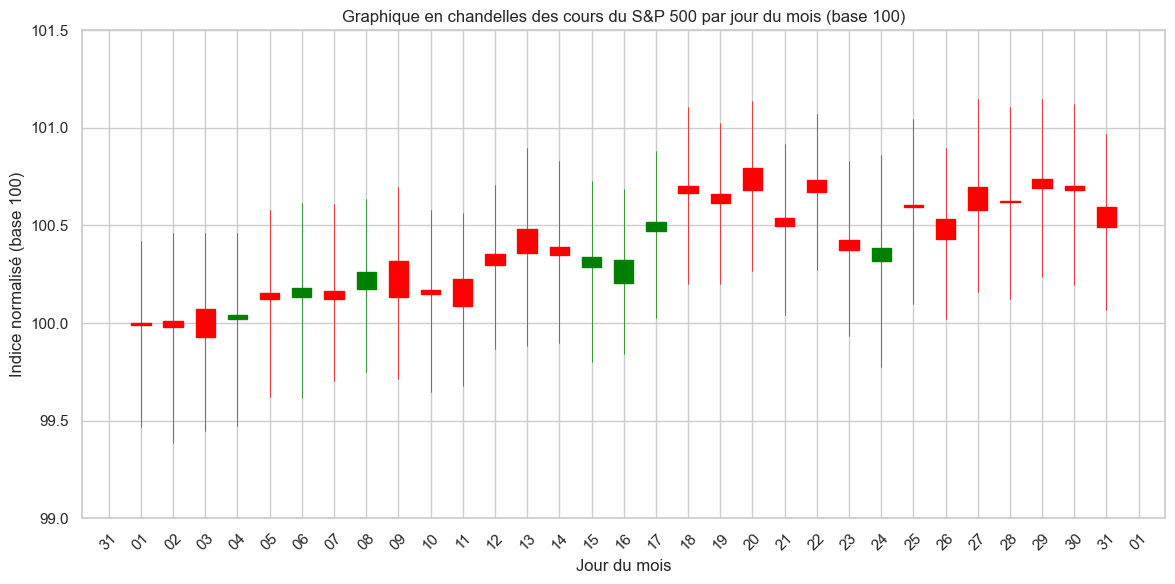

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Assurer que l'index est de type DatetimeIndex (si nécessaire)
if not isinstance(mean_data.index, pd.DatetimeIndex):
    mean_data.index = pd.to_datetime(mean_data.index, format='%d')

# Préparer les données pour le graphique en chandelles
ohlc_data = mean_data[['BASE_OPEN', 'BASE_HIGH', 'BASE_LOW', 'BASE_CLOSE']].copy()

# Convertir les dates en format numérique pour mplfinance
ohlc_data['DATE'] = mdates.date2num(ohlc_data.index)

# Créer un graphique en chandelles
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Tracer les chandelles avec les couleurs appropriées (vert pour hausses, rouge pour baisses)
candlestick_ohlc(ax, ohlc_data[['DATE', 'BASE_OPEN', 'BASE_HIGH', 'BASE_LOW', 'BASE_CLOSE']].values, 
                 width=0.6, colorup='green', colordown='red', alpha=1)

# Améliorer l'affichage du graphique
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Affichage du jour du mois
ax.xaxis.set_major_locator(mdates.DayLocator())  # Un tick par jour
plt.title('Graphique en chandelles des cours du S&P 500 par jour du mois (base 100)')
plt.xlabel('Jour du mois')
plt.ylabel('Indice normalisé (base 100)')

# Ajouter une grille et ajuster les limites
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(99, 101.5)
plt.show()


C:\Users\a-niv\AppData\Local\Temp\ipykernel_10688\797552194.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_dates['MONTH'] = investment_dates['DATE'].dt.month
C:\Users\a-niv\AppData\Local\Temp\ipykernel_10688\797552194.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_dates['YEAR'] = investment_dates['DATE'].dt.year


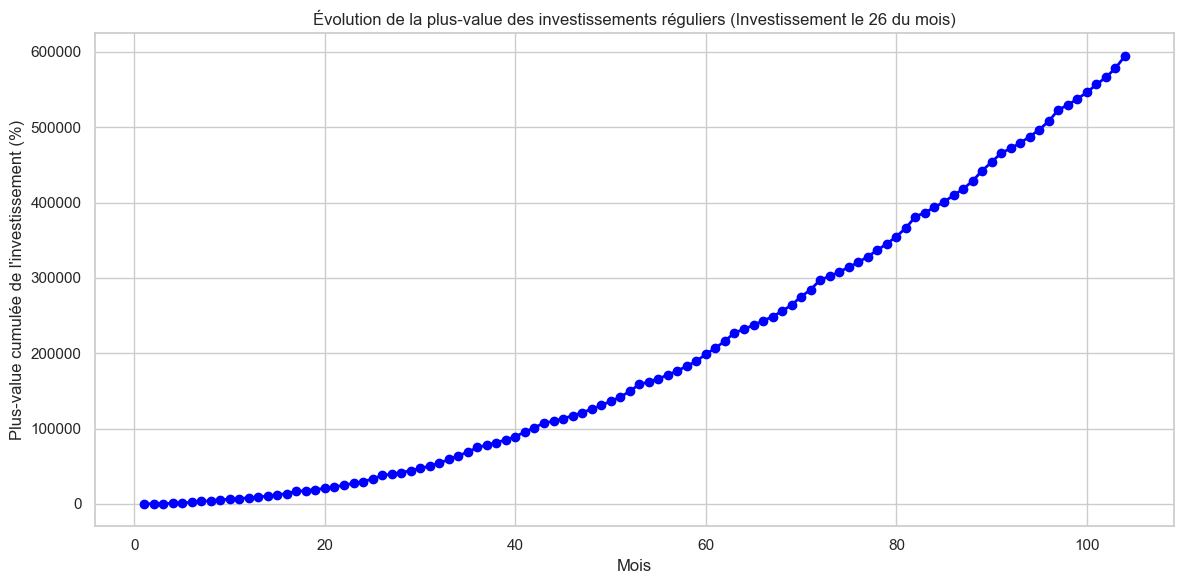

Le rendement total de l'investissement est de 58.74%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input de l'utilisateur
investment_day_of_the_month = 26  # Remplacez ce nombre par l'entrée de l'utilisateur (entre 1 et 31)

# Filtrage des jours correspondant à investment_day_of_the_month
investment_dates = data[data['DATE'].dt.day == investment_day_of_the_month]

# Création d'une nouvelle colonne pour identifier le premier jour ouvré après investment_day_of_the_month dans chaque mois
investment_dates['MONTH'] = investment_dates['DATE'].dt.month
investment_dates['YEAR'] = investment_dates['DATE'].dt.year

# Initialiser les variables pour le capital initial, les actions achetées, et les valeurs
capital_initial = 10000
total_shares = 0  # Nombre total d'actions achetées
total_investment_value = 0  # Valeur totale de l'investissement en actions
monthly_returns = []  # Liste pour stocker les rendements mensuels

# Parcourir chaque mois pour calculer l'investissement et son rendement
for month in range(1, 13):  # Pour chaque mois de l'année
    # Filtrer les dates de l'investissement pour ce mois
    month_investment_dates = investment_dates[investment_dates['MONTH'] == month]
    
    for _, row in month_investment_dates.iterrows():
        # Identifier le premier jour ouvré suivant investment_day_of_the_month
        first_trading_day = data[(data['DATE'].dt.month == month) & (data['DATE'].dt.year == row['YEAR']) & 
                                 (data['DATE'] > row['DATE'])]['DATE'].min()

        if pd.notnull(first_trading_day):
            # Récupérer le prix d'ouverture à ce jour
            first_open_price = data[(data['DATE'] == first_trading_day)]['OPEN'].values[0]
            
            # Calculer le nombre d'actions achetées avec le capital initial
            shares_bought = capital_initial / first_open_price  # Nombre d'actions achetées ce mois
            total_shares += shares_bought  # Accumuler le nombre total d'actions
            
            # Calculer la valeur totale de l'investissement à la fin du mois (au prix de clôture du mois)
            final_price = data[(data['DATE'] == first_trading_day)]['CLOSE'].values[0]  # Prix de clôture de ce jour
            total_investment_value = total_shares * final_price  # Valeur totale de l'investissement

            # Calcul du rendement mensuel
            monthly_return = (total_investment_value - (shares_bought * first_open_price)) / (shares_bought * first_open_price) * 100
            monthly_returns.append(monthly_return)

# Calcul du rendement total de l'investissement
initial_value = capital_initial * len(monthly_returns)  # Valeur initiale si on avait investi 10000 chaque mois
total_return = (total_investment_value - initial_value) / initial_value * 100

# Calcul du rendement moyen mensuel
average_monthly_return = np.mean(monthly_returns)

# Tracer l'évolution de la plus-value de l'investissement
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(monthly_returns) + 1), np.cumsum(monthly_returns), marker='o', linestyle='-', color='blue', linewidth=2)
plt.title(f'Évolution de la plus-value des investissements réguliers (Investissement le {investment_day_of_the_month} du mois)')
plt.xlabel('Mois')
plt.ylabel('Plus-value cumulée de l\'investissement (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Afficher le rendement total et le rendement moyen mensuel
print(f"Le rendement total de l'investissement est de {total_return:.2f}%")



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Initialisation des variables pour le capital initial et l'accumulation des rendements
capital_initial = 10000
total_returns = {}  # Dictionnaire pour stocker les rendements totaux par investment_day_of_the_month
investment_days_range = range(1, 32)  # De 1 à 31

# Fonction pour extraire les données nécessaires pour chaque jour d'investissement
def prepare_investment_data(investment_day_of_the_month, data):
    investment_dates = data[data['DATE'].dt.day == investment_day_of_the_month]
    investment_dates['MONTH'] = investment_dates['DATE'].dt.month
    investment_dates['YEAR'] = investment_dates['DATE'].dt.year
    return investment_dates

# Fonction de calcul du rendement
def calculate_investment_return(investment_day_of_the_month, data, capital_initial):
    investment_dates = prepare_investment_data(investment_day_of_the_month, data)
    
    # Variables pour accumuler les valeurs de l'investissement
    total_shares = 0
    total_investment_value = 0
    monthly_returns = []

    # Parcourir chaque mois pour calculer l'investissement et son rendement
    for month in range(1, 13):  # Pour chaque mois de l'année
        month_investment_dates = investment_dates[investment_dates['MONTH'] == month]
        
        for _, row in month_investment_dates.iterrows():
            first_trading_day = data[(data['DATE'].dt.month == month) & (data['DATE'].dt.year == row['YEAR']) & 
                                     (data['DATE'] > row['DATE'])]['DATE'].min()

            if pd.notnull(first_trading_day):
                first_open_price = data[(data['DATE'] == first_trading_day)]['OPEN'].values[0]
                shares_bought = capital_initial / first_open_price
                total_shares += shares_bought
                final_price = data[(data['DATE'] == first_trading_day)]['CLOSE'].values[0]
                total_investment_value = total_shares * final_price

                monthly_return = (total_investment_value - (shares_bought * first_open_price)) / (shares_bought * first_open_price) * 100
                monthly_returns.append(monthly_return)

    # Calcul du rendement total
    if monthly_returns:
        initial_value = capital_initial * len(monthly_returns)
        total_return = (total_investment_value - initial_value) / initial_value * 100
        return investment_day_of_the_month, total_return, np.cumsum(monthly_returns)
    return investment_day_of_the_month, 0, []

# Initialiser la figure pour le tracé des courbes
plt.figure(figsize=(12, 12))

# Utiliser joblib.Parallel pour paralléliser les calculs
results = Parallel(n_jobs=-1)(delayed(calculate_investment_return)(investment_day, data, capital_initial) 
                               for investment_day in investment_days_range)

# Traiter les résultats et tracer les courbes
for investment_day_of_the_month, total_return, monthly_returns in results:
    total_returns[investment_day_of_the_month] = total_return


# Afficher le tableau des rendements totaux sans l'index
total_returns_df = pd.DataFrame(list(total_returns.items()), columns=['Investment Day', 'Total Return (%)'])
total_returns_df.sort_values(by='Total Return (%)', ascending=False, inplace=True)

# Réinitialiser l'index et ne pas l'afficher
total_returns_df.reset_index(drop=True, inplace=True)

print("Rendement total de l'investissement par jour d'investissement :")
print(total_returns_df)


Rendement total de l'investissement par jour d'investissement :
    Investment Day  Total Return (%)
0               30         60.499441
1               27         59.203286
2               26         58.744460
3               13         58.189783
4               20         57.338771
5               18         57.273656
6               10         57.100608
7               28         56.163955
8               15         56.091968
9               21         56.070474
10              19         55.911460
11              12         55.865166
12              14         55.851068
13              17         55.398672
14               3         55.248080
15              22         55.018736
16              11         53.605836
17               7         52.907219
18               6         52.544805
19               8         51.532013
20               4         51.319641
21               5         51.227367
22               1         49.462849
23               2         35.205333
24         

<Figure size 1200x1200 with 0 Axes>